## **| 모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**
___


확률적 경사 하강법, 미니배치 경사 하강법 사용. 정규방정식, SVD 사용하지 않음.

### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**
___

학습률이 너무 높아 비용 함수 발산. 학습률을 낮추어야 한다. 그래도 검증 오차가 상승한다면 train set에 과대적합이 되어 있으므로 훈련을 중단.

### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**
___

훈련 오차가 검증 오차와 거의 비슷하면 아직 학습이 덜 된 것으로 높은 편향이 문제이다. 따라서 알파를 감소시킨다.

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷

- 1. 규제 있는 모델이 없는 모델보다 성능이 좋아서
- 2. 일부 특성만 사용하고 싶을 때 사용
- 3. 라쏘는 불규칙하게 행동하므로 단점을 보완하는 엘라스틱넷 사용.

### **추가) 조기 종료를 사용한 배치 경사 하강법으로 iris 데이터를 활용해 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
from sklearn.datasets import load_iris
iris = load_iris()

In [74]:
X = iris["data"][:, (2,3)] # 꽃잎 길이, 너비
y = iris["target"]

In [75]:
X_b = np.c_[np.ones([len(X),1]),X] # 편도 함수에 적용하기 위해 추가

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_b,y, test_size=0.2, random_state=42)

In [77]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_onehot = encoder.fit_transform(y_test.reshape(-1,1)).toarray()

In [78]:
theta = np.random.randn(3,3)
print(theta)

[[ 1.24815464 -1.54203065 -0.68594895]
 [ 1.44615057 -0.51508722  0.53565408]
 [-1.8659621  -0.49776062 -1.3493819 ]]


In [79]:
s_x = X_b @ theta
print(s_x.shape)

(150, 3)


In [80]:
def softmax(z):
    exps = np.exp(z)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps/exp_sums

In [81]:
n_inputs = X_train.shape[1]
n_inputs

3

In [82]:
n_outputs = len(np.unique(y_train))
n_outputs

3

In [83]:
np.unique(y_train)

array([0, 1, 2])

In [84]:
eta = 0.1
n_epochs=100
m=len(X_train)
epsilon = 1e-7

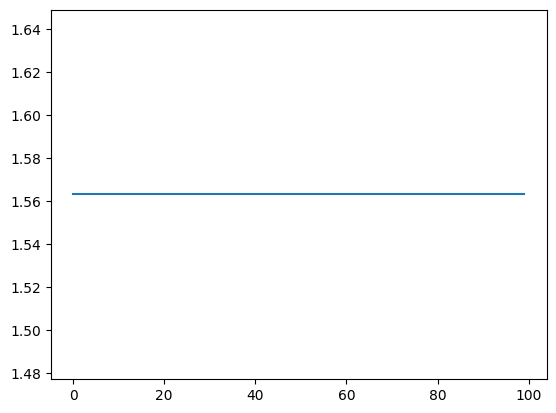

In [87]:
history=[]
for epoch in range(n_epochs):
  p_k = softmax(X_train)
  loss = -np.mean(np.sum(y_train_onehot*np.log(p_k+epsilon), axis=1))
  error = p_k - y_train_onehot
  gradients = 1/m * (X_train.T.dot(error))
  theta = theta - eta*gradients
  history.append(loss)
plt.plot(history)

In [89]:
theta

array([[  3.31093347,  -6.06076602,   1.7700076 ],
       [  3.96584339, -18.96796087,  16.46883491],
       [ -1.55458954,  -6.74628441,   4.58776933]])